# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

df = pd.read_csv("nhanes_2015_2016.csv")
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

,BPXSY1,BPXSY2,BPXDI1,BPXDI2
BPXSY1,1.000000,0.962287,0.316531,0.277681
BPXSY2,0.962287,1.000000,0.329843,0.303847
BPXDI1,0.316531,0.329843,1.000000,0.884722
BPXDI2,0.277681,0.303847,0.884722,1.000000


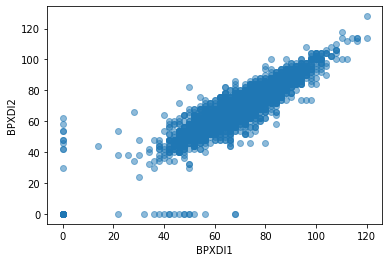

In [9]:
# enter your code here
sns.regplot(x = "BPXDI1", y= "BPXDI2", data = df, fit_reg = False, scatter_kws = {"alpha" : 0.5})
df[['BPXSY1', 'BPXSY2', 'BPXDI1','BPXDI2']].corr()

__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

The correlation between repeated blood pressure measurements is higher for systolic blood pressure as fcompared to diastolic blood pressure by 8 basis points.

__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

No, there isn't a significant difference between the two measurements

## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

<ipython-input-17-671718f23551>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['RIAGENDRx', 'RIDRETH1'])['BPXSY1', 'BPXSY2'].corr().iloc[:,[True, False]]


BPXSY1
RIAGENDRx RIDRETH1                 
Female    1        BPXSY1  1.000000
                   BPXSY2  0.965449
          2        BPXSY1  1.000000
                   BPXSY2  0.966790
          3        BPXSY1  1.000000
                   BPXSY2  0.962341
          4        BPXSY1  1.000000
                   BPXSY2  0.970334
          5        BPXSY1  1.000000
                   BPXSY2  0.963980
Male      1        BPXSY1  1.000000
                   BPXSY2  0.952572
          2        BPXSY1  1.000000
                   BPXSY2  0.963614
          3        BPXSY1  1.000000
                   BPXSY2  0.945468
          4        BPXSY1  1.000000
                   BPXSY2  0.971765
          5        BPXSY1  1.000000
                   BPXSY2  0.950135

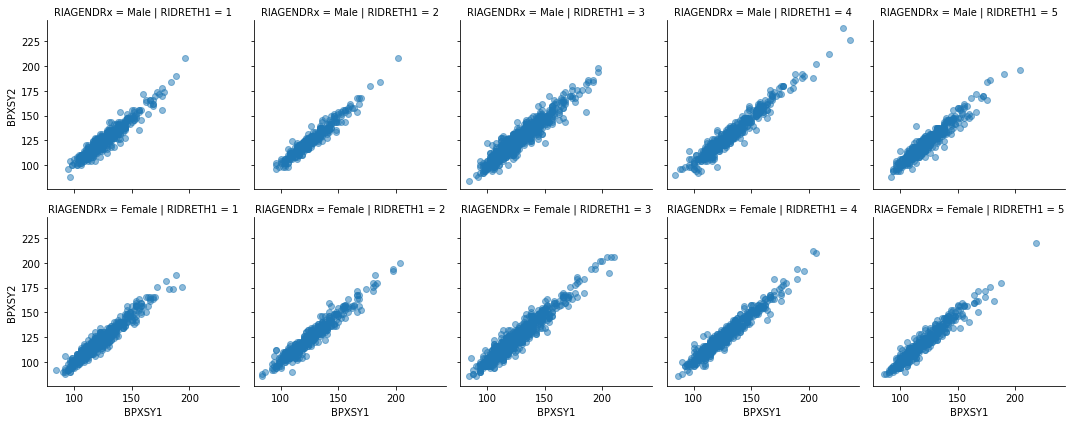

In [17]:
df["RIAGENDRx"] = df.RIAGENDR.replace({1: "Male", 2: "Female"})
_ = sns.FacetGrid(df, row = "RIAGENDRx", col = "RIDRETH1").map(plt.scatter, 'BPXSY1', 'BPXSY2', alpha = 0.5).add_legend()
df.groupby(['RIAGENDRx', 'RIDRETH1'])['BPXSY1', 'BPXSY2'].corr().iloc[:,[True, False]]

__Q3a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

 The paerson correlation coefficient between the two blood presure variables is similar accross ethinicities and gender (between 0.94 and 0.97). The correlation is lowest for males of ethnicity 3 and highest for males of ethnicity 4

## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

<AxesSubplot:xlabel='DMDEDUC2', ylabel='RIDAGEYR'>

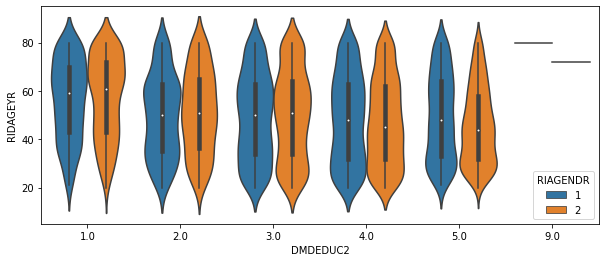

In [20]:
plt.figure(figsize = (10,4))
sns.violinplot(x = "DMDEDUC2", y= "RIDAGEYR", hue = "RIAGENDR", data = df)

__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

We do not observe any difference in the distribtuion between Males and Females. There is, however, a differnce in distribution across the 5 groups defined by education attainment.

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

<AxesSubplot:xlabel='age_grp', ylabel='BMXBMI'>

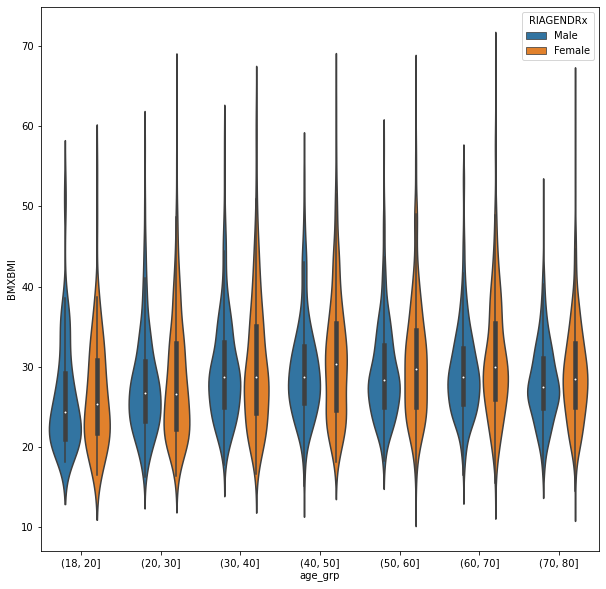

In [29]:
plt.figure(figsize = (10,10))
df['RIDAGEYR'].unique().min(), df['RIDAGEYR'].unique().max()
df['age_grp'] = pd.cut(x = df['RIDAGEYR'], bins = [18,20,30,40,50,60,70,80])
sns.violinplot(x = "age_grp", y = "BMXBMI", hue = "RIAGENDRx", data = df)

__Q5a.__ Comment on the trends in BMI across the demographic groups.

We observe that women tend to have lower BMI as compared to men across all ethnicities. Another takeaway that we draw from the graph is that the BMI levels increase for both genders till the age of 50 after which the BMI levels plateau.

## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [37]:
df.groupby('RIDRETH1')['HIQ210'].value_counts().unstack().apply(lambda x: x/x.sum(), axis = 1)

HIQ210,1.0,2.0,9.0
RIDRETH1,,,
1,0.137982,0.857567,0.004451
2,0.128696,0.871304,NaN
3,0.067354,0.931432,0.001214
4,0.108654,0.890385,0.000962
5,0.081761,0.915723,0.002516


__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?

3